In [2]:
import pickle
import pandas as pd
import numpy as np
from psm_causal_effects import psm_causal_effects
from extract_remove_nans import extract_remove_nans

# read data
with open('data.dat') as f:
    data, subjects = pickle.load(f)
f.close()

scorefunction = 'replacement'
output = 'linear'
var_threshold = 0.5

inds = range(len(data))
#inds = range(10)

es_s2m = np.zeros([len(data),4])
es_m2s = np.zeros([len(data),4])
es_s2m_um = np.zeros([len(data), 1])
es_m2s_um = np.zeros([len(data), 1])

for (c,i) in enumerate(inds):

    if np.nanstd(data[i]['mood'])<var_threshold or np.nanstd(data[i]['quality'])<var_threshold:
        print 'skipping subject '+str(i)+' due to low variance in mood or sleep quality.'
        es_m2s_um[c] = np.nan
        es_m2s[c,:] = np.nan
        es_s2m_um[c] = np.nan
        es_s2m[c,:] = np.nan
        continue

    # mood on sleep - lag 0 - unmatched
    treatment = 'mood_prev'
    outcome = 'quality'
    data_s = extract_remove_nans(data[i], [treatment]+[outcome])
    es_m2s_um[c] = psm_causal_effects(treatment=data_s[treatment], outcome=data_s[outcome], confound=[], scorefun='unmatched', output=output)

    # mood on sleep - lag 0
    confound = ['dow', 'mean_temp_prev2', 'clear_prev2', 'act_prev2','daytype','stress_prev2','energy_prev2','focus_prev2']
    data_s = extract_remove_nans(data[i], [treatment]+[outcome]+confound)
    es_m2s[c,0] = psm_causal_effects(treatment=data_s[treatment], outcome=data_s[outcome], confound=data_s[confound], scorefun=scorefunction, output=output)

    # mood on sleep - lag 1
    confound = ['dow', 'mean_temp_prev2', 'clear_prev2', 'act_prev2','daytype','stress_prev2','energy_prev2','focus_prev2','mood_prev2','quality_prev']
    data_s = extract_remove_nans(data[i], [treatment]+[outcome]+confound)
    es_m2s[c,1] = psm_causal_effects(treatment=data_s[treatment], outcome=data_s[outcome], confound=data_s[confound], scorefun=scorefunction, output=output)

    # mood on sleep - lag 2
    confound = ['dow', 'mean_temp_prev2', 'clear_prev2', 'act_prev2','daytype','stress_prev2','energy_prev2','focus_prev2','mood_prev2','quality_prev','mood_prev3','quality_prev2']
    data_s = extract_remove_nans(data[i], [treatment]+[outcome]+confound)
    es_m2s[c,2] = psm_causal_effects(treatment=data_s[treatment], outcome=data_s[outcome], confound=data_s[confound], scorefun=scorefunction, output=output)

    # mood on sleep - lag 3
    confound = ['dow', 'mean_temp_prev2', 'clear_prev2', 'act_prev2','daytype','stress_prev2','energy_prev2','focus_prev2','mood_prev2','quality_prev','mood_prev3','quality_prev2','mood_prev4','quality_prev3']
    data_s = extract_remove_nans(data[i], [treatment]+[outcome]+confound)
    es_m2s[c,3] = psm_causal_effects(treatment=data_s[treatment], outcome=data_s[outcome], confound=data_s[confound], scorefun=scorefunction, output=output)

    ################ sleep on mood

    # sleep on mood - lag 0 - unmatched
    treatment = 'quality'
    outcome = 'mood'
    data_s = extract_remove_nans(data[i], [treatment]+[outcome])
    es_s2m_um[c] = psm_causal_effects(treatment=data_s[treatment], outcome=data_s[outcome], confound=[], scorefun='unmatched', output=output)

    # sleep on mood - lag 0
    confound = ['dow', 'mean_temp_prev', 'clear_prev', 'act_prev','daytype','stress_prev','energy_prev','focus_prev']
    data_s = extract_remove_nans(data[i], [treatment]+[outcome]+confound)
    es_s2m[c,0] = psm_causal_effects(treatment=data_s[treatment], outcome=data_s[outcome], confound=data_s[confound], scorefun=scorefunction, output=output)

    # sleep on mood - lag 1
    confound = ['dow', 'mean_temp_prev', 'clear_prev','act_prev','daytype','stress_prev','energy_prev','focus_prev','mood_prev','quality_prev']
    data_s = extract_remove_nans(data[i], [treatment]+[outcome]+confound)
    es_s2m[c,1] = psm_causal_effects(treatment=data_s[treatment], outcome=data_s[outcome], confound=data_s[confound], scorefun=scorefunction, output=output)

    # sleep on mood - lag 2
    confound = ['dow', 'mean_temp_prev', 'clear_prev','act_prev','daytype','stress_prev','energy_prev','focus_prev','mood_prev','quality_prev','mood_prev2','quality_prev2']
    data_s = extract_remove_nans(data[i], [treatment]+[outcome]+confound)
    es_s2m[c,2] = psm_causal_effects(treatment=data_s[treatment], outcome=data_s[outcome], confound=data_s[confound], scorefun=scorefunction, output=output)

    # sleep on mood - lag 3
    confound = ['dow', 'mean_temp_prev', 'clear_prev','act_prev','daytype','stress_prev','energy_prev','focus_prev','mood_prev','quality_prev','mood_prev2','quality_prev2','mood_prev3','quality_prev3']
    data_s = extract_remove_nans(data[i], [treatment]+[outcome]+confound)
    es_s2m[c,3] = psm_causal_effects(treatment=data_s[treatment], outcome=data_s[outcome], confound=data_s[confound], scorefun=scorefunction, output=output)

    
    

    

skipping subject 6 due to low variance in mood or sleep quality.
skipping subject 8 due to low variance in mood or sleep quality.
skipping subject 19 due to low variance in mood or sleep quality.
skipping subject 21 due to low variance in mood or sleep quality.
skipping subject 26 due to low variance in mood or sleep quality.


C:\Users\Sofia\Anaconda3\envs\ana41py2dot7\lib\site-packages\numpy\lib\nanfunctions.py:1202: RuntimeWarning: Degrees of freedom <= 0 for slice.
  warnings.warn("Degrees of freedom <= 0 for slice.", RuntimeWarning)


skipping subject 42 due to low variance in mood or sleep quality.
skipping subject 49 due to low variance in mood or sleep quality.
skipping subject 57 due to low variance in mood or sleep quality.
skipping subject 61 due to low variance in mood or sleep quality.
skipping subject 64 due to low variance in mood or sleep quality.
skipping subject 78 due to low variance in mood or sleep quality.
skipping subject 93 due to low variance in mood or sleep quality.
skipping subject 96 due to low variance in mood or sleep quality.
skipping subject 114 due to low variance in mood or sleep quality.
skipping subject 116 due to low variance in mood or sleep quality.
skipping subject 135 due to low variance in mood or sleep quality.
skipping subject 139 due to low variance in mood or sleep quality.
skipping subject 153 due to low variance in mood or sleep quality.
skipping subject 158 due to low variance in mood or sleep quality.
skipping subject 171 due to low variance in mood or sleep quality.
ski

In [3]:
import operator
a = np.abs(es_s2m_um - es_s2m)

indices = np.argsort(-a, axis=0)
indices



C:\Users\Sofia\Anaconda3\envs\ana41py2dot7\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in absolute
  from ipykernel import kernelapp as app


array([[ 31, 125, 125,  71],
       [ 67,  67,  31, 177],
       [ 44,  31, 111, 111],
       [106, 122, 122, 136],
       [111, 199, 177, 122],
       [136, 185, 199, 199],
       [206, 183,  29, 181],
       [ 43,  76,  76, 128],
       [200,  44,  14,  31],
       [143,  41, 143,  83],
       [ 98, 195, 206, 112],
       [ 69,   0,  69,  86],
       [124, 124, 200,  14],
       [161, 177,  44, 167],
       [ 18,  46, 131,   3],
       [122, 200, 180,  87],
       [181, 157, 124, 143],
       [  0,  69, 140, 124],
       [186,  24, 120, 180],
       [146,  53, 112, 146],
       [177, 181, 157, 191],
       [127, 111, 195, 200],
       [165, 146,  43, 198],
       [178,  18, 146, 195],
       [129,  43,   1, 186],
       [160,  14, 155,  44],
       [176,  52, 181, 131],
       [ 76,  12,   0,  80],
       [173, 180, 173, 205],
       [190, 186, 176,  76],
       [ 55,  85, 149, 133],
       [ 92, 179,  45, 154],
       [138,  98,  52, 149],
       [140, 112, 118,   0],
       [157,  

In [4]:
# good:69, 
i =69 


print es_s2m_um[i]
print es_s2m[i, ]
print data[i][treatment].size



[ 0.39888029]
[ 0.09695199  0.08350902  0.03166678  0.18072964]
61


In [7]:
scorefunction = 'replacement'

treatment = 'quality'
outcome = 'mood'
confound = ['dow', 'mean_temp_prev', 'clear_prev', 'act_prev','daytype','stress_prev','energy_prev','focus_prev']
data1 = extract_remove_nans(data[i], [treatment]+[outcome]+confound)
score1, ind_t1, ind_c1 = psm_causal_effects(treatment=data1[treatment], outcome=data1[outcome],\
                                 confound=data1[confound], scorefun=scorefunction, output=output, return_indices=True)
print ind_t1, ind_c1

[ 2  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 32 33 35 36 37 38 39 40 41
 42 45 46 47 49 50 52 53] [48  3 31 54 31 54 31 31 31 31 31 31 31 31 55 55 31 43 44 54  3 31 43 43 27
  5  5 48  5 48 31 48 31]


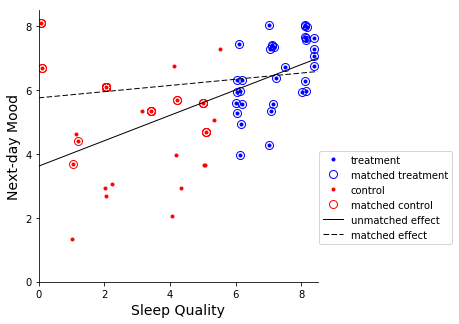

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm 
import statsmodels.formula.api as smf

np.random.seed(seed=101)

noise_amp_mood = 0.05#0.075
noise_amp_quality = 0.2#0.2


plt.figure(figsize=[5,5])

#psm
#score1, ind_t1, ind_c1 = psm_causal_effects(treatment=data1['quality'], outcome=data1['mood'], confound=data1[['mood_prev','stress_prev','daytype','dow','act_prev','quality_prev','mean_temp']], scorefun='replacement', output='difference', return_indices=True)

plt.xlabel('Sleep Quality', fontsize=14)
plt.ylabel('Next-day Mood', fontsize=14)
plt.xlim([0,8])
plt.ylim([0,8])

#plt.legend(['subject 1','subject 2','pooled','mixed'],bbox_to_anchor=(1.4, 1))

#noise vectors
n_quality = np.abs(noise_amp_quality*np.random.randn(data1[treatment].size))
n_mood = noise_amp_mood*np.random.randn(data1[treatment].size)

case_inds = np.where(data1[treatment]>=np.nanmean(data1[treatment]))[0]
control_inds = np.where(data1[treatment]<np.nanmean(data1[treatment]))[0]

# matched cases and controls
#for i in range(ind_t1.size):
#    plt.plot([data1['quality'][ind_c1[i]]+n_quality[ind_c1[i]], data1['quality'][ind_t1[i]]+n_quality[ind_t1[i]]],\
#             [data1['mood'][ind_c1[i]]+n_mood[ind_c1[i]], data1['mood'][ind_t1[i]]+n_mood[ind_t1[i]]],'-',alpha=.5, \
#             color=(0.5, 0.5, 0.5))


# cases and matched cases
plt.plot(data1['quality'][case_inds]+n_quality[case_inds],data1['mood'][case_inds]+n_mood[case_inds],'.',markersize=6,\
        markeredgecolor =(0,0,1),alpha=1,markerfacecolor=(0,0,1))
plt.plot(data1['quality'][ind_t1]+n_quality[ind_t1],data1['mood'][ind_t1]+n_mood[ind_t1],'o',markersize=8,\
        markeredgecolor =(0,0,1),alpha=1,markerfacecolor="none")


# controls and matched controls
plt.plot(data1['quality'][control_inds]+n_quality[control_inds],data1['mood'][control_inds]+n_mood[control_inds],'.',markersize=6,\
        markeredgecolor =(1,0,0),alpha=1,markerfacecolor=(1,0,0))
plt.plot(data1['quality'][ind_c1]+n_quality[ind_c1],data1['mood'][ind_c1]+n_mood[ind_c1],'o',markersize=8,\
        markeredgecolor =(1,0,0),alpha=1,markerfacecolor="none")

plt.ylim([0,8.5])
plt.xlim([0,8.5])

#remove box

ax = plt.gca()
ax.spines['left'].set_position('zero')

# turn off the right spine/ticks
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()

# set the y-spine
ax.spines['bottom'].set_position('zero')

# turn off the top spine/ticks
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()

plt.xticks(np.arange(0,9,2));
plt.yticks(np.arange(0,9,2));

# plot regression lines
md = smf.glm('mood ~ quality', data1)
mdf = md.fit()
betas = mdf.params

plt.plot([0,8.5], [betas[0],betas[0]+betas[1]*8.5], linewidth=1, color =(0,0,0))
#plt.plot([0,8.2], [mdf.params[0],mdf.params[0]+mdf.params[1]*8.2], color=(.2, .2,.2), linewidth=3, alpha=1)

md_matched = smf.glm('mood ~ quality', data1.loc[np.concatenate((ind_t1, ind_c1)),:])
mdf_matched=md_matched.fit()
betas_matched =mdf_matched.params

plt.plot([0,8.5], [betas_matched[0],betas_matched[0]+betas_matched[1]*8.5], linewidth=1, color =(0,0,0), linestyle = '--')

plt.legend(["treatment","matched treatment", "control", "matched control", "unmatched effect", "matched effect"], bbox_to_anchor=(1.5, .5) )

In [93]:
betas[1]

0.39702341261021001